In [2]:
import matplotlib.pyplot as plt 
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn import neural_network, neighbors, svm, tree

In [5]:
from sklearn.datasets import fetch_california_housing
# Загружаем данные
california = fetch_california_housing()
# Создаем датафрейм
X = pd.DataFrame(california.data, columns = california.feature_names)
# Определяем атрибуты
y = california.target
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


---
### Эксперементы с моделью
Какую еще информацию можно вывести для обученной модели?

In [30]:
model = LinearRegression()

# Обучаем модель
model.fit(X, y)
# Проходим по всем переменным модели и выводим их значения
for k, v in vars(model).items():
    print(f"{k}: {v}\n")


fit_intercept: True

copy_X: True

n_jobs: None

positive: False

feature_names_in_: ['MedInc' 'HouseAge' 'AveRooms' 'AveBedrms' 'Population' 'AveOccup'
 'Latitude' 'Longitude']

n_features_in_: 8

coef_: [ 4.36693293e-01  9.43577803e-03 -1.07322041e-01  6.45065694e-01
 -3.97638942e-06 -3.78654265e-03 -4.21314378e-01 -4.34513755e-01]

rank_: 8

singular_: [1.62693602e+05 1.73178899e+03 1.48489456e+03 4.13011226e+02
 3.68485454e+02 2.47744430e+02 7.18215739e+01 2.50607596e+01]

intercept_: -36.94192020718445



---
Попробуйте изменить аргументы при создании модели и посмотрите, как это влияет на качество предсказания.

In [34]:
model = LinearRegression(fit_intercept=False)
# Считаем, что введенные данные без отклонения
# fit_intercept: bool = False
model.fit(X, y)
print(f"{model.score(X, y):.3%}")
# Результат ухудшился

54.624%


In [46]:
model = LinearRegression(positive=True)

# Использовать только позитивные индексы
# positive: bool = True
model.fit(X, y)
print(f"{model.score(X, y):.3%}")
# Результат ухудшился

51.023%


---
### Другие модели
Попробуйте применить к той же задаче другие модели регрессии. Для каждой из них выведите визуализацию регрессии и оценку точности. Рекомендуется исследовать следующие модели:

1) Метод опорных векторов
    1) Без ядра
    2) С гауссовым ядром
    3) С полиномиальным ядром
2) Метод ближайших соседей
3) Многослойный перцептрон
4) Дерево решений

In [21]:
# Классы моделей, их названия и параметры для запуска
methods = [
    [svm.LinearSVR, "Метод опорных векторов с линейным ядром"],
    # Может долго обучаться
    [svm.SVR, "Метод опорных векторов с Гауссовым ядром", {"kernel": "rbf"}],
    # Может долго обучаться
    [svm.SVR, "Метод опорных векторов с полиномиальным ядром", {"kernel": "poly"}],
    [neighbors.RadiusNeighborsRegressor, "Метод ближайших соседей", {}],
    [
        neural_network.MLPRegressor,
        "Многослойный персептрон",
        {"hidden_layer_sizes": 20},
    ],
    [tree.DecisionTreeRegressor, "Дерево решений", {}],
]

---
 Напишите функцию, которая автоматически обучает все перечисленные модели и для каждой выдает оценку точности.

In [55]:
def test(X, y, Model, name, kwargs={}):
    # Создаем модель
    regr = Model(**kwargs)
    # Обучаем
    regr.fit(X, y)
    # Выводим качество модели
    print(f"{name}: {regr.score(X, y):.3%}")
    # Рисуем график
    fig, ax = plt.subplots()
    ax.set_title(name)
    ax.plot(range(50), y[:50], color='green')
    ax.scatter(range(50), regr.predict(X[:50]), color='red')
    ax.legend(['Ожидаемые', 'Полученные'])


c:\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Метод опорных векторов с линейным ядром: -90.391%
Метод опорных векторов с Гауссовым ядром: -1.659%
Метод опорных векторов с полиномиальным ядром: -3.167%
Метод ближайших соседей: 99.854%
Многослойный персептрон: 56.164%
Дерево решений: 100.000%


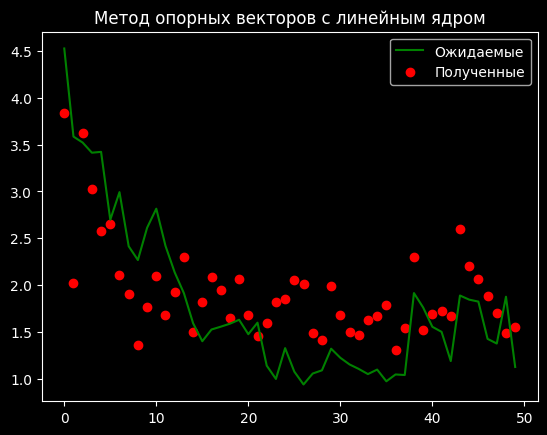

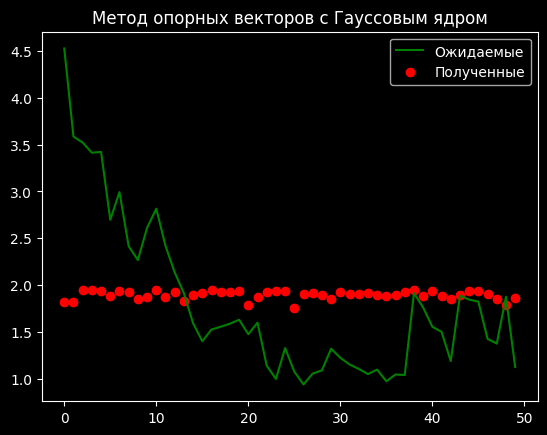

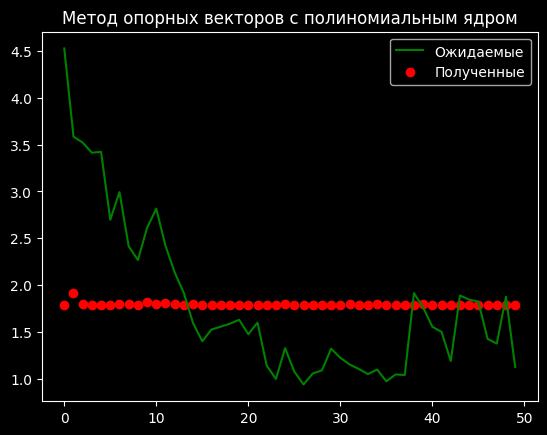

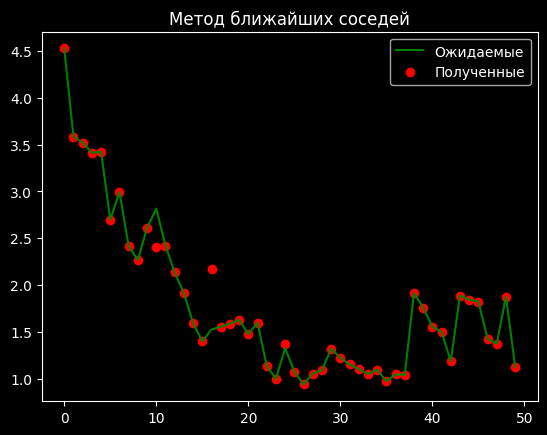

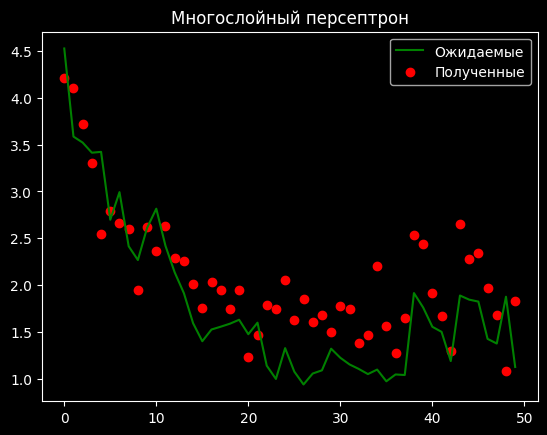

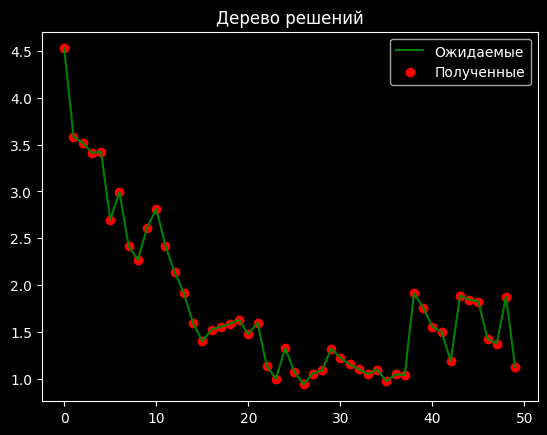

In [56]:
for d in methods:
    test(X, y, *d)

---
### Тестирование на других данных
Повторите полностью анализ для другого набора данных - встроенного в sklearn датасета diabetes.

In [53]:
# Для датасета с диабетами
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
diabetes_data = pd.DataFrame(diabetes.data, columns = diabetes.feature_names)
diabetes_data['Progress'] = diabetes.target
y1 = diabetes_data['Progress']
X1 = diabetes_data.drop('Progress', axis=1)
diabetes_data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Progress
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


c:\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Метод опорных векторов с линейным ядром: -27.818%
Метод опорных векторов с Гауссовым ядром: 20.718%
Метод опорных векторов с полиномиальным ядром: 29.259%
Метод ближайших соседей: 0.000%


c:\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Многослойный персептрон: -365.071%
Дерево решений: 100.000%


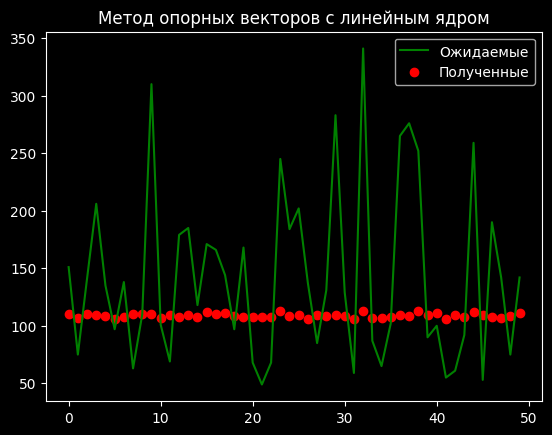

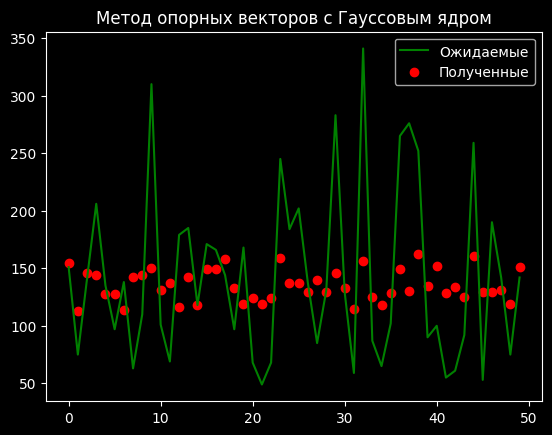

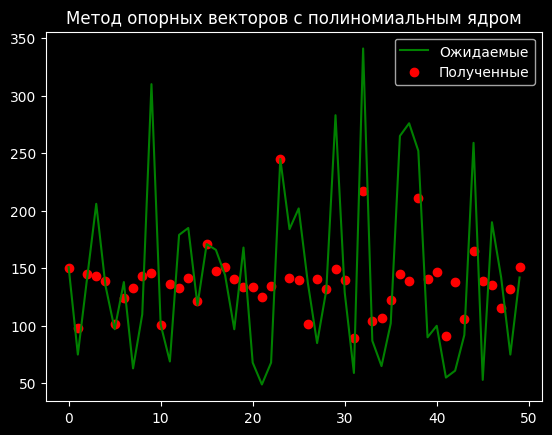

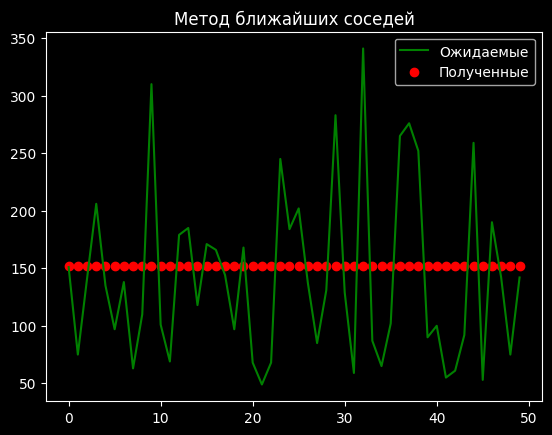

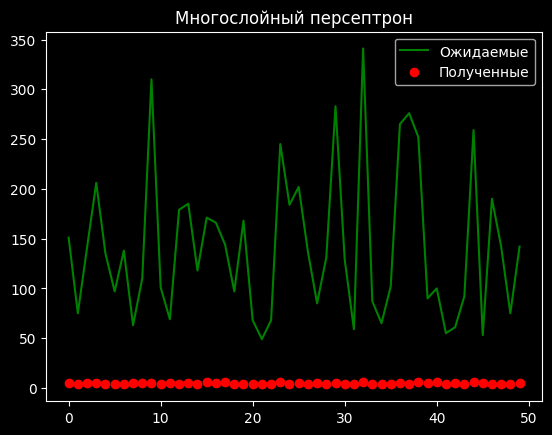

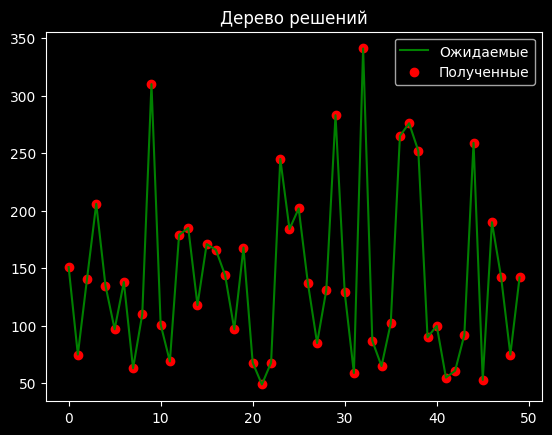

In [57]:
for d in methods:
    test(X1, y1, *d)

1) Метод опорных векторов\
https://scikit-learn.ru/1-4-support-vector-machines/

2) Метод ближайших соседей\
https://scikit-learn.ru/1-6-nearest-neighbors/

3) Многослойный персептрон\
https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.htmlsklearn.neural_network.MLPRegressor

4) Дерево решений\
https://scikit-learn.ru/1-10-decision-trees/